<h1> Introduction to Regression </h1>

# What is Regression

![Linear Regression](images/extrapolating.png)

Regression is one of the most important and broadly used machine learning and statistics tools out there. It allows you to make predictions from data by learning the relationship between features of your data and some observed, continuous-valued response. Regression is used in a massive number of applications ranging from predicting stock prices to understanding gene regulatory networks.
<p> The major difference between regression and classification is that classification predicts discrete labels like whether the passenger survives or not whereas regression predicts continuous labels like what will be price of the stock after one month.

# Random Forest Regressor

In [1]:
%load_ext autoreload

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

House Prices [dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [5]:
df_train = pd.read_csv('../data/house_prices/train.csv')
df_test = pd.read_csv('../data/house_prices/test.csv')

In [6]:
display_all(df_train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [7]:
display_all(df_train.head().T)

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [8]:
numeric_columns = [df_train.columns[idx] for idx in range(df_train.shape[1]) if df_train.dtypes[idx] != 'object']
df_train = df_train.loc[:, numeric_columns]
df_test = df_test.loc[:, numeric_columns]

/home/katph/miniconda3/envs/ml-workshop/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [9]:
df_train.isnull().sum().sort_index()/len(df_train), df_test.isnull().sum().sort_index()/len(df_test)

(1stFlrSF         0.000000
 2ndFlrSF         0.000000
 3SsnPorch        0.000000
 BedroomAbvGr     0.000000
 BsmtFinSF1       0.000000
 BsmtFinSF2       0.000000
 BsmtFullBath     0.000000
 BsmtHalfBath     0.000000
 BsmtUnfSF        0.000000
 EnclosedPorch    0.000000
 Fireplaces       0.000000
 FullBath         0.000000
 GarageArea       0.000000
 GarageCars       0.000000
 GarageYrBlt      0.055479
 GrLivArea        0.000000
 HalfBath         0.000000
 Id               0.000000
 KitchenAbvGr     0.000000
 LotArea          0.000000
 LotFrontage      0.177397
 LowQualFinSF     0.000000
 MSSubClass       0.000000
 MasVnrArea       0.005479
 MiscVal          0.000000
 MoSold           0.000000
 OpenPorchSF      0.000000
 OverallCond      0.000000
 OverallQual      0.000000
 PoolArea         0.000000
 SalePrice        0.000000
 ScreenPorch      0.000000
 TotRmsAbvGrd     0.000000
 TotalBsmtSF      0.000000
 WoodDeckSF       0.000000
 YearBuilt        0.000000
 YearRemodAdd     0.000000
 

In [10]:
X = df_train.drop('SalePrice', axis=1)
df_test.drop('SalePrice', axis=1, inplace=True)
X.shape, df_test.shape

((1460, 37), (1459, 37))

In [11]:
df = pd.concat([X, df_test])
df.shape

(2919, 37)

In [12]:
null_cols = df.columns[df.isnull().sum() != 0]
for col in null_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [13]:
X = df.iloc[:1460].copy()
df_test = df.iloc[1460:].copy()
X.shape, df_test.shape

((1460, 37), (1459, 37))

In [14]:
y = df_train['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=1)

/home/katph/miniconda3/envs/ml-workshop/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
X_train.shape, X_val.shape

((1021, 37), (439, 37))

In [16]:
def rmse(x,y): return np.sqrt(((np.log(x)-np.log(y))**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_val), y_val),
                m.score(X_train, y_train), m.score(X_val, y_val)]
    print(res)

In [17]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print_score(model)

[0.06805787802117193, 0.17176032085736598, 0.9678680852814503, 0.9045268728453724]


/home/katph/miniconda3/envs/ml-workshop/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Kaggle House Prices [Submission](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/submit)

In [18]:
y_predict = model.predict(df_test)
with open('out.csv', 'w') as f:
    f.write('Id,SalePrice\n')
    for pid, val in zip(df_test['Id'].values, y_predict):
        f.write(f'{pid},{val}\n')

In [19]:
from matplotlib.legend_handler import HandlerLine2D

Text(0.5, 0, 'n_estimators')

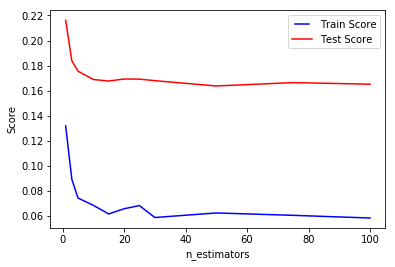

In [20]:
n_estimators = [1, 3, 5, 10, 15, 20, 25, 30, 50, 75, 100]
train_results = []
test_results = []
for n_estimator in n_estimators:
    model = RandomForestRegressor(n_estimators=n_estimator)
    model.fit(X_train, y_train)
    train_results.append(rmse(model.predict(X_train), y_train))
    test_results.append(rmse(model.predict(X_val), y_val))

line1, = plt.plot(n_estimators, train_results, 'b', label="Train Score")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('n_estimators')

Text(0.5, 0, 'min_samples_leaf')

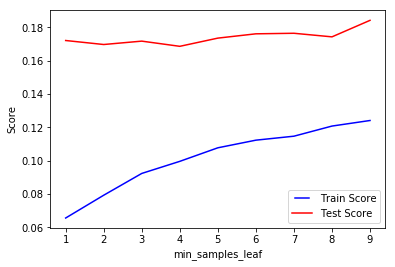

In [21]:
min_samples_leaf = list(range(1, 10))
train_results = []
test_results = []
for min_sample_leaf in min_samples_leaf:
    model = RandomForestRegressor(n_estimators=10, min_samples_leaf=min_sample_leaf)
    model.fit(X_train, y_train)
    train_results.append(rmse(model.predict(X_train), y_train))
    test_results.append(rmse(model.predict(X_val), y_val))

line1, = plt.plot(min_samples_leaf, train_results, 'b', label="Train Score")
line2, = plt.plot(min_samples_leaf, test_results, 'r', label="Test Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('min_samples_leaf')

Text(0.5, 0, 'max_features')

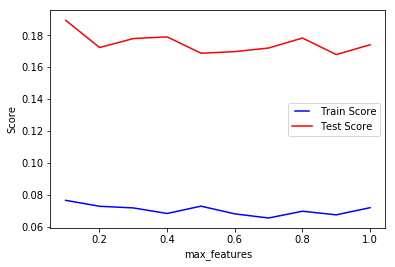

In [22]:
max_features = np.linspace(0.1, 1, 10, endpoint=True)
train_results = []
test_results = []
for max_feature in max_features:
    model = RandomForestRegressor(n_estimators=10, max_features=max_feature)
    model.fit(X_train, y_train)
    train_results.append(rmse(model.predict(X_train), y_train))
    test_results.append(rmse(model.predict(X_val), y_val))

line1, = plt.plot(max_features, train_results, 'b', label="Train Score")
line2, = plt.plot(max_features, test_results, 'r', label="Test Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('max_features')

In [23]:
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=5, max_features=0.6)
model.fit(X_train, y_train)
print_score(model)

[0.101808651450603, 0.17099863803579135, 0.9145084358508279, 0.8735043272245057]


In [24]:
y_predict = model.predict(df_test)
with open('out.csv', 'w') as f:
    f.write('Id,SalePrice\n')
    for pid, val in zip(df_test['Id'].values, y_predict):
        f.write(f'{pid},{val}\n')

In [25]:
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=5, max_features=0.6)
model.fit(X, y)
print_score(model)

[0.09780827789614595, 0.11563491854815866, 0.9207706717622636, 0.9491308200236661]


# Linear Regression

Linear regression is a linear approach to modelling the relationship between a scalar response (label) and one or more explanatory variables (features).
<p>Simple linear regression uses traditional slope-intercept form, where m and b are the variables our algorithm will try to “learn” to produce the most accurate predictions. x represents our input data and y represents our prediction.

`y=mx+b`

<h3> Cost Function </h3>
Cost function helps us to optimize our weights, we will use mean squared error as the cost function.

Given our simple linear equation y=mx+b, we can calculate MSE as:

![MSE](images/mse.png)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)
print_score(model)

[0.18264254571989186, 0.20154252719623864, 0.7955771904762687, 0.8243292854113218]


/home/katph/miniconda3/envs/ml-workshop/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/home/katph/miniconda3/envs/ml-workshop/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


# K Nearest Neighbor Regressor

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [29]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
print_score(model)

[0.1820780353386631, 0.271417836369417, 0.7500567597269187, 0.6053837885296769]


Text(0.5, 0, 'n_neighbors')

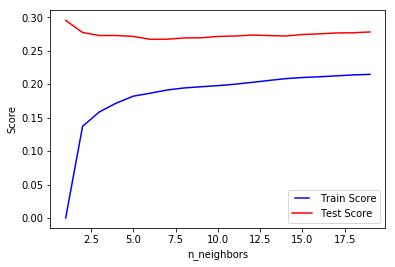

In [34]:
n_neighbors = list(range(1, 20))
train_results = []
test_results = []
for n_neighbor in n_neighbors:
    model = KNeighborsRegressor(n_neighbors=n_neighbor)
    model.fit(X_train, y_train)
    train_results.append(rmse(model.predict(X_train), y_train))
    test_results.append(rmse(model.predict(X_val), y_val))

line1, = plt.plot(n_neighbors, train_results, 'b', label="Train Score")
line2, = plt.plot(n_neighbors, test_results, 'r', label="Test Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('n_neighbors')

In [36]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
print_score(model)

[0.1820780353386631, 0.271417836369417, 0.7500567597269187, 0.6053837885296769]


# Application of Regression

One interesting application that we can have of Regression algorithm is image completion. We will use all the above algorithms to predict and complete one half of an image.

In [37]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

In [38]:
data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/katph/scikit_learn_data


In [42]:
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [56]:
%matplotlib qt

In [58]:
image_shape = (64, 64)
n_cols = 2
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")
    
    completed_face = np.hstack((X_test[i], y_predict[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2,
                          title='Random Forest')

    sub.axis("off")
    sub.imshow(completed_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

Bike Sharing Demand challenge on [Kaggle](https://www.kaggle.com/c/bike-sharing-demand)